In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
import yfinance
import indicators
%matplotlib inline

In [2]:
data = yfinance.download('IDT')
print(data.shape)
data = data.reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed
(4781, 6)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-05-16,33.601013,33.601013,33.601013,33.601013,12.179194,0
1,2001-05-17,33.601013,33.601013,33.601013,33.601013,12.179194,0
2,2001-05-18,33.601013,33.601013,33.601013,33.601013,12.179194,0
3,2001-05-21,33.601013,33.601013,33.601013,33.601013,12.179194,0
4,2001-05-22,33.601013,33.601013,33.601013,33.601013,12.179194,0


In [3]:
# Calculating CCI
def cci(data, ndays): 
    TP = (data['High'] + data['Low'] + data['Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data

data = cci(data,20)

In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,CCI
4776,2020-05-12,5.90,5.970,5.69,5.8200,5.8200,57400,128.363338
4777,2020-05-13,5.83,5.940,5.49,5.6000,5.6000,73700,65.052211
4778,2020-05-14,5.47,5.490,5.02,5.4200,5.4200,159900,-75.276463
4779,2020-05-15,5.47,5.810,5.39,5.6300,5.6300,70700,38.286939
4780,2020-05-18,5.47,6.135,5.87,6.0301,6.0301,67835,152.871166


# Random forest to forecast trend
- Let's start with something simple. We are only going to give a random forest the price of the stock m days in the past and we are going to as it to give us the prices for the next n days.

In [5]:
# Look back days
look_back = 21

# Forecast days
forecast_days = 5

# Calculate look backs
for i in range(1,look_back+1):
    data[f'Close{i}Past'] = data['Close'].shift(i)
    
# Calculate forecast days
for j in range(1,forecast_days+1):
    data[f'Close{j}'] = data['Close'].shift(-j)
    
data = data.dropna()
print(data.shape)
data.head()

(4755, 34)


,Date,Open,High,Low,Close,Adj Close,Volume,CCI,Close1Past,Close2Past,...,Close17Past,Close18Past,Close19Past,Close20Past,Close21Past,Close1,Close2,Close3,Close4,Close5
21,2001-06-15,27.514793,28.529163,25.359257,28.402367,10.294862,96000,-128.343349,28.554522,28.782755,...,33.601013,33.601013,33.601013,33.601013,33.601013,29.112427,27.895182,27.920542,28.098055,27.945900
22,2001-06-18,27.895182,29.467455,27.895182,29.112427,10.552235,34000,-79.459109,28.402367,28.554522,...,33.601013,33.601013,33.601013,33.601013,33.601013,27.895182,27.920542,28.098055,27.945900,27.261200
23,2001-06-19,28.909552,28.934912,25.866442,27.895182,10.111025,49500,-101.026171,29.112427,28.402367,...,33.601013,33.601013,33.601013,33.601013,33.601013,27.920542,28.098055,27.945900,27.261200,27.641590
24,2001-06-20,27.895182,28.275570,27.692308,27.920542,10.120217,104200,-81.300015,27.895182,29.112427,...,33.601013,33.601013,33.601013,33.601013,33.601013,28.098055,27.945900,27.261200,27.641590,28.275570
25,2001-06-21,27.920542,28.808115,27.895182,28.098055,10.184561,110900,-66.391218,27.920542,27.895182,...,35.502960,33.601013,33.601013,33.601013,33.601013,27.945900,27.261200,27.641590,28.275570,29.036348


In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'CCI',
       'Close1Past', 'Close2Past', 'Close3Past', 'Close4Past', 'Close5Past',
       'Close6Past', 'Close7Past', 'Close8Past', 'Close9Past', 'Close10Past',
       'Close11Past', 'Close12Past', 'Close13Past', 'Close14Past',
       'Close15Past', 'Close16Past', 'Close17Past', 'Close18Past',
       'Close19Past', 'Close20Past', 'Close21Past', 'Close1', 'Close2',
       'Close3', 'Close4', 'Close5'],
      dtype='object')

In [7]:
for days in [5,7,14,21,50,100]:
    data = indicators.accumulation_distribution(data,days)
    #data = indicators.average_true_range(data,days)
    data = indicators.bollinger_bands(data,days)
    # data = indicators.commodity_channel_index(data,days)
    data = indicators.coppock_curve(data,days)
    #data = indicators.donchian_channel(data,days)
    data = indicators.ease_of_movement(data,days)
    data = indicators.exponential_moving_average(data,days)
    data = indicators.force_index(data,days)
    data = indicators.keltner_channel(data,days)
    data = indicators.macd(data,days,days)
    data = indicators.momentum(data,days)
    #data = indicators.money_flow_index(data,days)
    data = indicators.moving_average(data,days)
    #data = indicators.on_balance_volume(data,days)
    data = indicators.rate_of_change(data,days)
    #data = indicators.relative_strength_index(data,days)
    data = indicators.standard_deviation(data,days)
    data = indicators.stochastic_oscillator_d(data,days)
    #data = indicators.trix(data,days)
    #data = indicators.vortex_indicator(data,days)
    
    
    
data = indicators.mass_index(data)
data = indicators.ppsr(data)
data = indicators.stochastic_oscillator_k(data)
#data = indicators.ultimate_oscillator(data)    
data = indicators.chaikin_oscillator(data)

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
print(data.shape)
data.tail()

(4310, 152)


,Date,Open,High,Low,Close,Adj Close,Volume,CCI,Close1Past,Close2Past,...,Mass Index,PP,R1,S1,R2,S2,R3,S3,SO%k,Chaikin
4771,2020-05-05,5.33,5.68,5.22,5.39,5.39,70400,1.344143,5.22,5.41,...,21.960117,5.430000,5.640000,5.180000,5.890000,4.970000,6.100000,4.720000,0.369565,-5561.417914
4772,2020-05-06,5.42,5.53,5.31,5.41,5.41,86600,-1.479027,5.39,5.22,...,22.029833,5.416667,5.523333,5.303333,5.636667,5.196666,5.743334,5.083333,0.454544,-5228.183376
4773,2020-05-07,5.48,5.68,5.36,5.46,5.46,112700,38.628808,5.41,5.39,...,22.163788,5.500000,5.640000,5.320000,5.820000,5.180000,5.960000,5.000000,0.312500,-15558.716878
4774,2020-05-08,5.60,5.90,5.60,5.78,5.78,83900,146.536136,5.46,5.41,...,22.294040,5.760000,5.920000,5.620000,6.060000,5.460000,6.220000,5.320000,0.600001,415.868532
4775,2020-05-11,5.70,5.92,5.57,5.84,5.84,69400,131.047514,5.78,5.46,...,22.421034,5.776667,5.983333,5.633334,6.126667,5.426667,6.333333,5.283334,0.771429,13561.274719


In [8]:
# Getting data ready for training
from sklearn.model_selection import train_test_split
X,y = data.drop(['Close1','Close2', 'Close3', 'Close4', 'Close5','Date'],axis=1),data[['Close1','Close2', 'Close3', 'Close4', 'Close5']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=101)
print(X_train.shape)
X_train.head()

(3879, 146)


,Open,High,Low,Close,Adj Close,Volume,CCI,Close1Past,Close2Past,Close3Past,...,Mass Index,PP,R1,S1,R2,S2,R3,S3,SO%k,Chaikin
4079,14.810000,14.860000,14.560000,14.730000,13.953571,102800,-75.784393,14.800000,14.970000,14.810000,...,22.754781,14.716667,14.873333,14.573333,15.016666,14.416667,15.173332,14.273334,0.566665,16715.317926
2813,8.427726,8.639053,8.402367,8.579882,6.240464,51400,15.248349,8.622148,8.478445,8.613694,...,23.163425,8.540434,8.678501,8.441814,8.777121,8.303747,8.915188,8.205128,0.750000,6593.630092
2773,6.863905,6.889265,6.677938,6.889265,4.924520,49200,-76.926766,6.855452,6.813187,7.109045,...,24.898385,6.818822,6.959707,6.748380,7.030149,6.607495,7.171034,6.537053,1.000000,26449.328473
2352,14.750634,15.672020,14.750634,15.181742,5.691883,437400,153.064144,14.801353,14.606932,13.761623,...,23.415652,15.201465,15.652296,14.730911,16.122851,14.280080,16.573682,13.809525,0.467890,-6790.087653
3383,15.010000,15.480000,14.920000,15.480000,11.938212,282200,22.605010,15.000000,14.970000,14.980000,...,26.638785,15.293333,15.666666,15.106667,15.853333,14.733334,16.226665,14.546667,1.000000,99163.536011


In [9]:
# Random forest time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
preds = model.predict(X_test)
preds = pd.DataFrame(preds,columns=y_test.columns)

In [10]:
y_test['Direction'] = y_test['Close5'] > y_test['Close1']
preds['Direction'] = preds['Close5'] > preds['Close1']
preds

/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close1,Close2,Close3,Close4,Close5,Direction
0,15.677331,15.128989,14.708715,14.220830,13.717675,False
1,18.183936,18.306033,18.313105,18.553638,18.736364,True
2,30.521995,30.583364,30.319679,30.421927,30.557447,True
3,18.062846,17.825924,17.803165,17.616853,17.480383,False
4,16.013038,15.946505,15.890206,15.774335,15.788015,False
...,...,...,...,...,...,...
426,12.861466,13.013844,13.156741,13.263505,13.462273,True
427,10.115395,10.434157,10.757232,11.009034,11.195773,True
428,39.937633,39.854810,39.763821,39.873728,39.984294,True
429,35.229687,35.419983,35.540287,35.608098,35.879544,True


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test['Direction'],preds['Direction']))
print(confusion_matrix(y_test['Direction'],preds['Direction']))

              precision    recall  f1-score   support

       False       0.70      0.71      0.71       218
        True       0.70      0.69      0.70       213

    accuracy                           0.70       431
   macro avg       0.70      0.70      0.70       431
weighted avg       0.70      0.70      0.70       431

[[155  63]
 [ 66 147]]


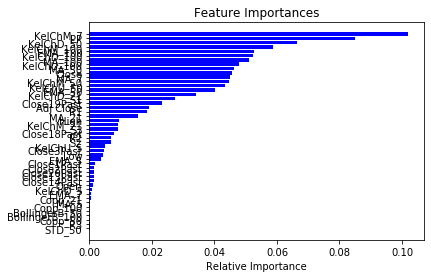

In [12]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[100:])), importances[indices][100:], color='b', align='center')
plt.yticks(range(len(indices[100:])), [features[i] for i in indices[100:]])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
good_features = [features[i] for i in indices[100:]]

In [14]:
X = X[good_features]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=101)
print(X_train.shape)
X_train.head()

(3879, 46)


,STD_50,R3,Copp_50,BollingerB_100,BollingerB_50,Copp_100,MA_5,Copp_21,EMA_7,KelChD_5,...,Close,MA_50,KelChU_100,MA_100,KelChD_100,EMA_100,KelChM_100,KelChD_50,PP,KelChM_7
4079,0.988978,15.173332,0.005729,0.377561,0.260384,-0.295663,14.870000,-0.017860,14.862703,14.542000,...,14.730000,15.192600,15.329500,14.820700,14.279500,15.468109,14.804500,14.677667,14.716667,14.858095
2813,0.739289,8.915188,0.068852,0.346277,0.383243,-0.469963,8.578191,0.327388,8.588518,8.353902,...,8.579882,7.716145,7.924937,7.667625,7.398648,8.147424,7.661792,7.459735,8.540434,8.584712
2773,0.593461,7.171034,-0.189710,0.267633,0.315358,-0.931610,6.899408,-0.188317,6.890218,6.619893,...,6.889265,7.527472,7.874162,7.598817,7.324711,8.244538,7.599436,7.288757,6.818822,6.867528
2352,1.209500,16.573682,1.388572,1.039623,0.341705,3.892051,14.343196,-0.073033,14.335317,13.483235,...,15.181742,14.158411,12.373176,11.632122,10.852635,11.798287,11.612905,13.344435,15.201465,14.063116
3383,0.555020,16.226665,-0.136347,0.238419,0.142769,-0.129454,15.074000,-0.087260,15.101783,14.747334,...,15.480000,15.550200,16.564567,16.152700,15.755367,15.861813,16.159967,15.142733,15.293333,14.984286


In [15]:
# Random forest time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train,y_train)
preds = model.predict(X_test)
preds = pd.DataFrame(preds,columns=y_test.columns)

In [16]:
y_test['Direction'] = y_test['Close5'] > y_test['Close1']
preds['Direction'] = preds['Close5'] > preds['Close1']
preds

/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close1,Close2,Close3,Close4,Close5,Direction
0,15.577407,14.925065,14.454196,13.585213,12.731785,False
1,18.152890,18.396769,18.521003,18.837822,18.963347,True
2,30.625460,30.685131,30.380566,30.507160,30.701412,True
3,18.133141,17.851060,17.827673,17.602150,17.450307,False
4,15.967469,15.830357,15.805836,15.672397,15.585882,False
...,...,...,...,...,...,...
426,12.783942,12.904726,12.992412,13.099671,13.294078,True
427,10.060864,10.328483,10.668410,10.936435,11.147732,True
428,39.777439,39.799476,39.716196,39.928250,40.169670,True
429,35.156906,35.403398,35.521674,35.574446,35.918927,True


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test['Direction'],preds['Direction']))
print(confusion_matrix(y_test['Direction'],preds['Direction']))

              precision    recall  f1-score   support

       False       0.71      0.73      0.72       218
        True       0.71      0.69      0.70       213

    accuracy                           0.71       431
   macro avg       0.71      0.71      0.71       431
weighted avg       0.71      0.71      0.71       431

[[159  59]
 [ 65 148]]
